**Nama : Rafa Fadil Aras**

**Kelas : TI-3G**

**NIM : 2341720007**

# **UTS Machine Learning - Studi kasus 2 : Credit Card Dataset**

## **1. Preprocessing Data**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('UCI_Credit_Card.csv')

df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Dataset ini terdiri dari 30.000 baris (nasabah) dan 25 kolom (fitur).

**Tipe Data** : Sebagian besar kolom adalah tipe numerik, yaitu 13 kolom float64 dan 12 kolom int64. Ini menunjukkan data sudah siap untuk perhitungan matematis.

**Missing Value**s : Berdasarkan output, tidak ada satupun kolom yang memiliki missing values. Hal ini disimpulkan karena kolom Non-Null Count untuk setiap fitur menunjukkan angka 30.000, yang sama persis dengan jumlah total entri data (RangeIndex: 30000 entries). ✅

In [ ]:
missing_summary = df.isnull().sum()
print(missing_summary[missing_summary>0])


Series([], dtype: int64)


In [ ]:
df_num = df.select_dtypes(include=['int64','float64']).copy()
df_cat = df.select_dtypes(include=['object','category']).copy()
for col in df_num.columns:
    if df_num[col].isnull().any():
        df_num[col].fillna(df_num[col].median(), inplace=True)
for col in df_cat.columns:
    if df_cat[col].isnull().any():
        df_cat[col].fillna(df_cat[col].mode().iloc[0], inplace=True)
print(df_num.isnull().sum().sum(), df_cat.isnull().sum().sum())

0 0.0


In [ ]:
if 'BALANCE' in df_num.columns and 'PURCHASES' in df_num.columns:
    df_num['Balance_Purchase_Ratio'] = df_num['BALANCE'] / (df_num['PURCHASES'] + 1)
else:
    num_cols = df_num.columns.tolist()
    if len(num_cols) >= 2:
        df_num['New_Feature_Ratio'] = df_num[num_cols[0]] / (df_num[num_cols[1]] + 1)
    else:
        df_num['New_Feature'] = 0
df_num.shape

(30000, 28)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)
print(X_scaled.shape)

(30000, 28)


## **2. Clastering - K-Means**

In [ ]:
best_k = 2
best_score = -1
scores_k = {}
for k in range(2,7):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    try:
        s = silhouette_score(X_scaled, labels)
    except:
        s = -1
    scores_k[k] = s
    if s>best_score:
        best_score = s
        best_k = k
best_k, scores_k

(2,
 {2: np.float64(0.35781209186586704),
  3: np.float64(0.17485709581798223),
  4: np.float64(0.14960011242031332),
  5: np.float64(0.1607659918973404),
  6: np.float64(0.15488137917497277)})

In [ ]:
## Evaluasi

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_scaled)
sil_k = silhouette_score(X_scaled, labels_kmeans)
dbi_k = davies_bouldin_score(X_scaled, labels_kmeans)
print("KMeans chosen k", best_k)
print("KMeans Silhouette", sil_k)
print("KMeans Davies-Bouldin", dbi_k)

KMeans chosen k 2
KMeans Silhouette 0.35781209186586704
KMeans Davies-Bouldin 1.5266631652170597


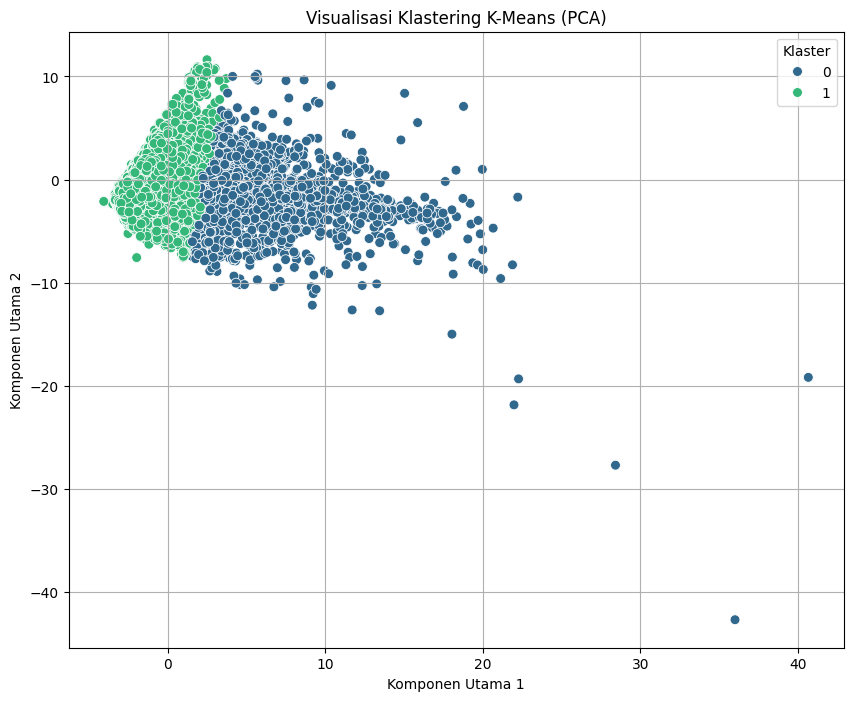

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=X_pca, columns=['Komponen Utama 1', 'Komponen Utama 2'])
df_pca['Cluster'] = labels_kmeans

# Visualisasi
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Komponen Utama 1', y='Komponen Utama 2', hue='Cluster', data=df_pca, palette='viridis', s=50)
plt.title('Visualisasi Klastering K-Means (PCA)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend(title='Klaster')
plt.grid(True)
plt.show()

## **Clastering - DBScan**

In [ ]:
eps_candidates = [0.5,1.0,1.5,2.0,2.5,3.0]
best_eps = None
best_dbscan_score = -1
best_dbscan_labels = None
dbscan_results = {}
for eps in eps_candidates:
    db = DBSCAN(eps=eps, min_samples=5)
    labels_db = db.fit_predict(X_scaled)
    mask = labels_db != -1
    if mask.sum()>0 and len(set(labels_db[mask]))>1:
        try:
            s = silhouette_score(X_scaled[mask], labels_db[mask])
            dbscan_results[eps] = s
            if s>best_dbscan_score:
                best_dbscan_score = s
                best_eps = eps
                best_dbscan_labels = labels_db
        except:
            pass
best_eps, best_dbscan_score, dbscan_results


(3.0,
 np.float64(0.41167579640378815),
 {0.5: np.float64(0.14102470019016583),
  1.0: np.float64(0.01927615858710858),
  1.5: np.float64(-0.13754454889260753),
  2.0: np.float64(-0.04586851083901697),
  2.5: np.float64(0.17730416252437506),
  3.0: np.float64(0.41167579640378815)})

In [ ]:
# Evaluasi

if best_dbscan_labels is None:
    dbscan = DBSCAN(eps=2.5, min_samples=5)
    labels_dbscan = dbscan.fit_predict(X_scaled)
else:
    dbscan = DBSCAN(eps=best_eps, min_samples=5)
    labels_dbscan = dbscan.fit_predict(X_scaled)
mask_db = labels_dbscan != -1
if mask_db.sum()>0 and len(set(labels_dbscan[mask_db]))>1:
    try:
        sil_db = silhouette_score(X_scaled[mask_db], labels_dbscan[mask_db])
        dbi_db = davies_bouldin_score(X_scaled[mask_db], labels_dbscan[mask_db])
        print("DBSCAN eps", dbscan.eps)
        print("DBSCAN Silhouette (non-noise)", sil_db)
        print("DBSCAN Davies-Bouldin (non-noise)", dbi_db)
    except Exception as e:
        print("DBSCAN eval error", e)
else:
    print("DBSCAN did not produce evaluable clusters")


DBSCAN eps 3.0
DBSCAN Silhouette (non-noise) 0.41167579640378815
DBSCAN Davies-Bouldin (non-noise) 0.7161706284337702


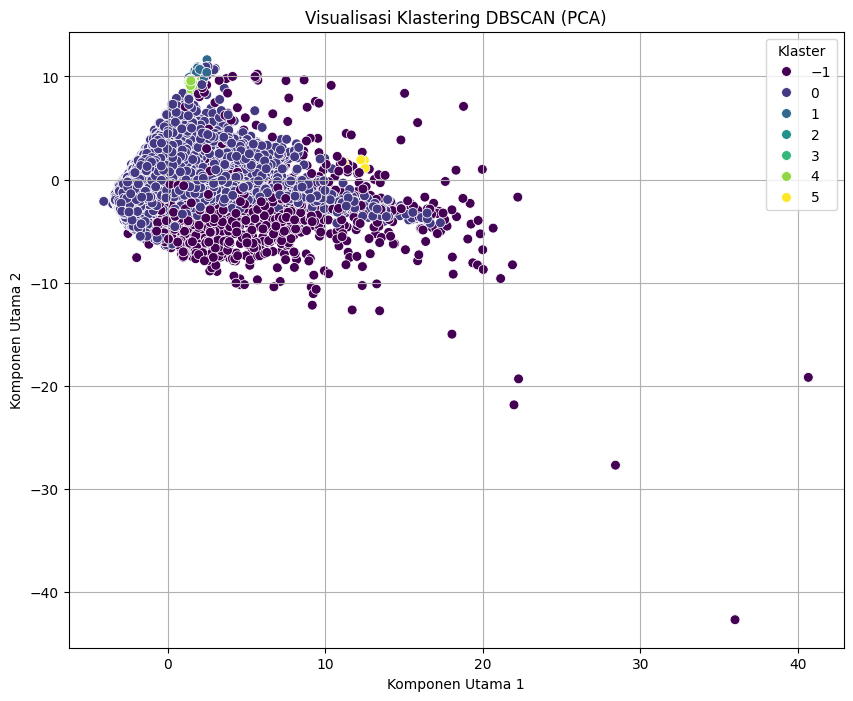

In [ ]:
pca = PCA(n_components=2)
X_pca_dbscan = pca.fit_transform(X_scaled)

df_pca_dbscan = pd.DataFrame(data=X_pca_dbscan, columns=['Komponen Utama 1', 'Komponen Utama 2'])
df_pca_dbscan['Cluster'] = labels_dbscan

# Visualisasi
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Komponen Utama 1', y='Komponen Utama 2', hue='Cluster', data=df_pca_dbscan, palette='viridis', s=50)
plt.title('Visualisasi Klastering DBSCAN (PCA)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend(title='Klaster')
plt.grid(True)
plt.show()

## **3. Approximate Nearest Neighbor (ANN)**

In [ ]:
!pip install annoy -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from annoy import AnnoyIndex

dim = X_scaled.shape[1]
ann = AnnoyIndex(dim, 'euclidean')
for i, v in enumerate(X_scaled):
    ann.add_item(i, v.tolist())
ann.build(50)
num_queries = 5
if X_scaled.shape[0] < num_queries:
    num_queries = X_scaled.shape[0]
query_indices = np.random.choice(X_scaled.shape[0], size=num_queries, replace=False)
n_neighbors = 5
for q in query_indices:
    neighbor_ids, distances = ann.get_nns_by_item(q, n_neighbors, include_distances=True)
    print("Query_Index:", q)
    for nid, dist in zip(neighbor_ids, distances):
        k_cl = int(labels_kmeans[nid])
        db_cl = int(labels_dbscan[nid])
        print("Neighbor_Index:", nid, "| Distance:", float(dist), "| KMeans:", k_cl, "| DBSCAN:", db_cl)
    print("----")


Query_Index: 21649
Neighbor_Index: 21649 | Distance: 0.0 | KMeans: 1 | DBSCAN: 0
Neighbor_Index: 21816 | Distance: 0.48092395067214966 | KMeans: 1 | DBSCAN: 0
Neighbor_Index: 21577 | Distance: 0.525501012802124 | KMeans: 1 | DBSCAN: 0
Neighbor_Index: 15872 | Distance: 0.5711401104927063 | KMeans: 1 | DBSCAN: 0
Neighbor_Index: 18611 | Distance: 0.5984985828399658 | KMeans: 1 | DBSCAN: 0
----
Query_Index: 27856
Neighbor_Index: 27856 | Distance: 0.0 | KMeans: 1 | DBSCAN: 0
Neighbor_Index: 18415 | Distance: 0.2779017984867096 | KMeans: 1 | DBSCAN: 0
Neighbor_Index: 7750 | Distance: 0.3357379138469696 | KMeans: 1 | DBSCAN: 0
Neighbor_Index: 21521 | Distance: 0.33968737721443176 | KMeans: 1 | DBSCAN: 0
Neighbor_Index: 7906 | Distance: 0.3658245801925659 | KMeans: 1 | DBSCAN: 0
----
Query_Index: 21640
Neighbor_Index: 21640 | Distance: 0.0 | KMeans: 1 | DBSCAN: 0
Neighbor_Index: 22241 | Distance: 1.1395485401153564 | KMeans: 1 | DBSCAN: 0
Neighbor_Index: 11088 | Distance: 1.1709978580474854 | 

In [ ]:
print("Summary Metrics")
print("KMeans Silhouette:", sil_k)
print("KMeans Davies-Bouldin:", dbi_k)
if mask_db.sum()>0 and len(set(labels_dbscan[mask_db]))>1:
    print("DBSCAN Silhouette (non-noise):", sil_db)
    print("DBSCAN Davies-Bouldin (non-noise):", dbi_db)
else:
    print("DBSCAN no valid clusters for global metrics")

Summary Metrics
KMeans Silhouette: 0.35781209186586704
KMeans Davies-Bouldin: 1.5266631652170597
DBSCAN Silhouette (non-noise): 0.41167579640378815
DBSCAN Davies-Bouldin (non-noise): 0.7161706284337702
